<a href="https://colab.research.google.com/github/cacordobae/An-lisis-de-ventas/blob/main/Analisis_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Análisis exploratorio de ventas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display, HTML
import plotly.express as px

cf.set_config_file(sharing='public', theme= 'ggplot',offline=True)



Se dispone de información sobre una operación de televentas que busca promover la generación de pedidos para negocios de venta directa. En la actualidad, la marca ha incorporado un nuevo grupo de representantes dee ventas que aún no han realizado su primer pedido. El objetivo es diseñar estrategias de acompañamiento para impulsar el éxito del negocio en este contexto.
Se desea describir a profundidad el comportamiento detallado de la base de datos.
Base de ventas: Comprende información sobre clientes que ya han sido gestionado
en otros ciclos campañales.
Las variables en la base de datos son:

 Numero de documento: identificación del cliente
 Salario: Salario mensual reportado por el cliente en última actualización.
 Ciudad: Ciudad del cliente
 Fecha de nacimiento: Fecha de nacimiento del cliente.
 Productos adquiridos: Define la cantidad de productos adquiridos
 Cantidad de productos Actuales: Cantidad de productos actuales.
 Tiene hijos: Variable dicótoma que define 1 si tiene hijos o 0 si no tiene hijos.
 Id producto: Graba el producto de uso mayor consumo para el cliente.
 Venta: Variable dicótoma Define 1 si es venta o 0 si no es venta
 telefono_fijo y telefono_celular: teléfonos de contacto del cliente.
A continuación se carga la base de datos:


In [ ]:
ventas = pd.read_csv("/base_ventas.csv" ,delimiter=";" , encoding='latin-1')
print(ventas.head(10))

   numero_documento             salario                      ciudad  \
0       53568925215   8340888,413484724            Puerto Leguízamo   
1       42389453003   5364789,048961766  San Sebastián de Mariquita   
2       65592068857  1652090,6241019825                     Córdoba   
3       34621413223   2510470,147313655      Santa Bárbara de Pinto   
4       97222106368  5860115,5216358015                      Sácama   
5       87430560256  1600068,4418343646                       Neiva   
6       12286423243   5215934,754383979                    El Retén   
7       43536537120  6603363,7228892045                       Albán   
8       56851153025   8695610,548346475                     Córdoba   
9       14103585497   8065695,201569497                   El Dorado   

      genero fecha_nacimiento  telefono_fijo  telefono_celular  \
0  Masculino       1980-05-24      264233357        3826820159   
1  Masculino       1950-08-30      228295387        3214217444   
2   Femenino       1

In [ ]:
#visualizar el tamaño del dataset
ventas.shape

(100000, 12)

In [ ]:
#renombrar la columna 'id_producto adquirido' por 'id_producto' para tratamientos de bases más adelante
ventas.rename(columns={'id_producto_adquirido': 'id_producto'}, inplace=True)
print(ventas.head())

   numero_documento             salario                      ciudad  \
0       53568925215   8340888,413484724            Puerto Leguízamo   
1       42389453003   5364789,048961766  San Sebastián de Mariquita   
2       65592068857  1652090,6241019825                     Córdoba   
3       34621413223   2510470,147313655      Santa Bárbara de Pinto   
4       97222106368  5860115,5216358015                      Sácama   

      genero fecha_nacimiento  telefono_fijo  telefono_celular  \
0  Masculino       1980-05-24      264233357        3826820159   
1  Masculino       1950-08-30      228295387        3214217444   
2   Femenino       1991-03-19      271937254        3150913071   
3   Femenino       1953-08-14      263509713        3641974249   
4  Masculino       1978-03-25      224964892        3949083122   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  id_producto  \
0                     0                           2            1           17   
1             

Chequeo de unicidad para las variables 'numero_documento', 'id_producto'

In [ ]:
#variable 'numero_documento'
duplicados= ventas['numero_documento'].duplicated()

if duplicados.any():
  print(f"Hay valores duplicados.")
else:
  print(f"No hay valores duplicados")

#variable 'id_producto'
duplicados1= ventas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")



No hay valores duplicados
Hay duplicados.


Como la variable 'id_producto' hay duplicados, haremos un conteo de cuántas veces se repite el id_producto y cuál es el que más se repite.

In [ ]:
repeticiones= ventas['id_producto'].value_counts()
valor_mas_comun= repeticiones.idxmax()
repe_valor_mas_comun= repeticiones.max()
print(f"Valores más comunes en la variable 'id_producto':")
print(repeticiones.head(10))
print(f"El valor que más se repite es {valor_mas_comun} con {repe_valor_mas_comun} repeticiones")



Valores más comunes en la variable 'id_producto':
78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64
El valor que más se repite es 78 con 1221 repeticiones


Chequeo de nulos

In [ ]:
ventas.isnull().sum()

numero_documento              0
salario                       0
ciudad                        0
genero                        0
fecha_nacimiento              0
telefono_fijo                 0
telefono_celular              0
productos_adquiridos          0
cantidad_producto_actuales    0
tiene_hijos                   0
id_producto                   0
venta                         0
dtype: int64

In [ ]:
#Eliminando duplicados
ventas.drop_duplicates()

,numero_documento,salario,ciudad,genero,fecha_nacimiento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta
0,53568925215,"8340888,413484724",Puerto Leguízamo,Masculino,1980-05-24,264233357,3826820159,0,2,1,17,0
1,42389453003,"5364789,048961766",San Sebastián de Mariquita,Masculino,1950-08-30,228295387,3214217444,0,1,0,83,0
2,65592068857,"1652090,6241019825",Córdoba,Femenino,1991-03-19,271937254,3150913071,9,2,0,61,1
3,34621413223,"2510470,147313655",Santa Bárbara de Pinto,Femenino,1953-08-14,263509713,3641974249,0,4,0,66,0
4,97222106368,"5860115,5216358015",Sácama,Masculino,1978-03-25,224964892,3949083122,3,3,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5710250773,"5790265,482312285",Supatá,Femenino,1963-04-02,218127849,3772190256,7,2,1,27,1
99996,21534716263,"5171567,021889742",El Charco,Femenino,1972-06-07,296153040,3143117497,4,5,0,76,1
99997,22606223063,"5662898,016611535",Suaita,Masculino,1977-06-21,279870471,3857213445,0,4,0,34,0
99998,39736547765,"4510828,888652727",Cáceres,Masculino,1956-04-20,216745410,3484281242,0,1,1,36,0


Visualización del tipo de datos de las columnas

In [ ]:
ventas.dtypes

numero_documento               int64
salario                       object
ciudad                        object
genero                        object
fecha_nacimiento              object
telefono_fijo                  int64
telefono_celular               int64
productos_adquiridos           int64
cantidad_producto_actuales     int64
tiene_hijos                    int64
id_producto                    int64
venta                          int64
dtype: object

Modificación del tipo de columna

In [ ]:
ventas['fecha_nacimiento']= pd.to_datetime(ventas['fecha_nacimiento'])

In [ ]:
#Confirmando el cambio de variables
ventas.dtypes

numero_documento                       int64
salario                               object
ciudad                                object
genero                                object
fecha_nacimiento              datetime64[ns]
telefono_fijo                          int64
telefono_celular                       int64
productos_adquiridos                   int64
cantidad_producto_actuales             int64
tiene_hijos                            int64
id_producto                            int64
venta                                  int64
dtype: object

In [ ]:
#modificando la variable salario
ventas['salario']= pd.to_numeric(ventas['salario'].astype(float))
ventas.dtypes

ValueError: ignored

Obtengamos el rango de edades de los representantes, para tener una idea más clara de nuestro público objetivo. Esto para definir si los productos son comprados por personas jóvenes, personas mayores, etc.

In [ ]:
#calcular la fecha min y máx de los representantes

print(np.min(ventas['fecha_nacimiento']))
print(np.max(ventas['fecha_nacimiento']))


1942-08-16 00:00:00
2005-08-14 00:00:00


In [ ]:
#Determinando la edad de la variable 'fecha_nacimiento' para determinar un rango de edades de clientes.

from datetime import datetime, date

def calcular_edad(nacimiento):
  nacimiento_str= nacimiento.strftime("%d/%m/%Y")
  nacimiento_date= datetime.strptime(nacimiento_str,"%d/%m/%Y").date()
  today= date.today()
  edad = today.year - nacimiento_date.year -((today.month, today.day) < (nacimiento_date.month, nacimiento_date.day))
  return edad

 #Aplicar la función calcular_edad a la columna 'fecha_nacimiento'

ventas['edad']= ventas['fecha_nacimiento'].apply(calcular_edad)

print(ventas.head(10))


   numero_documento             salario                      ciudad  \
0       53568925215   8340888,413484724            Puerto Leguízamo   
1       42389453003   5364789,048961766  San Sebastián de Mariquita   
2       65592068857  1652090,6241019825                     Córdoba   
3       34621413223   2510470,147313655      Santa Bárbara de Pinto   
4       97222106368  5860115,5216358015                      Sácama   
5       87430560256  1600068,4418343646                       Neiva   
6       12286423243   5215934,754383979                    El Retén   
7       43536537120  6603363,7228892045                       Albán   
8       56851153025   8695610,548346475                     Córdoba   
9       14103585497   8065695,201569497                   El Dorado   

      genero fecha_nacimiento  telefono_fijo  telefono_celular  \
0  Masculino       1980-05-24      264233357        3826820159   
1  Masculino       1950-08-30      228295387        3214217444   
2   Femenino       1

In [ ]:
#edades min y máx de los clientes
print(np.min(ventas['edad']))
print(np.max(ventas['edad']))

#Estadíticas

18
81


In [ ]:
ventas_genero = ventas.pivot(index='genero', columns='id_producto',values='venta')
ventas_genero

ValueError: ignored

Miremos las características estadísticas de cada una las variables del dataframe 'base_ventas'

In [ ]:
ventas.describe()

,numero_documento,telefono_fijo,telefono_celular,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta,edad
count,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,4.987610e+10,2.555909e+08,3.555479e+09,2.754040,2.995310,0.501170,45.57309,0.501290,49.071230
std,2.884153e+10,2.591828e+07,2.564292e+08,3.417537,1.415764,0.500001,25.39603,0.500001,18.181424
min,1.142969e+06,2.111114e+08,3.111114e+09,0.000000,1.000000,0.000000,2.00000,0.000000,18.000000
25%,2.484642e+10,2.333906e+08,3.333998e+09,0.000000,2.000000,0.000000,24.00000,0.000000,33.000000
50%,4.968547e+10,2.554814e+08,3.555380e+09,1.000000,3.000000,1.000000,46.00000,1.000000,49.000000
75%,7.487529e+10,2.778370e+08,3.778109e+09,6.000000,4.000000,1.000000,68.00000,1.000000,65.000000
max,9.999793e+10,2.999975e+08,3.999993e+09,10.000000,5.000000,1.000000,89.00000,1.000000,81.000000


De la tabla anterior rescatamos que el promedio del salario de los clientes está por encima de  $5'648.000 pesos, que el promedio de productos adquiridos por los clientes está en más de 2 productos y que el promedio de edad de los clientes está en 49 años.

In [ ]:
ventas.describe(include=['object'])

,salario,ciudad,genero
count,100000,100000,100000
unique,100000,1036,2
top,"8340888,413484724",Villanueva,Masculino
freq,1,369,50189


La ciudad que más aparece es Villanueva con una frecuencia de 369 veces y el cliente que más predomina es el género masculino con un frecuencia de 50189.
Es decir que, la ciudad que más vende es villanueva y hay más clientes hombres que clientes mujeres.


In [ ]:
#conteo de la variable 'ciudad'
ventas['ciudad'].value_counts()

Villanueva           369
Buenavista           344
La Unión             340
Guadalupe            294
Albania              289
                    ... 
Palermo               64
Francisco Pizarro     64
Junín                 63
Guatavita             61
González              58
Name: ciudad, Length: 1036, dtype: int64

[Text(0, 0, 'Villanueva'),
 Text(1, 0, 'Buenavista'),
 Text(2, 0, 'La Unión'),
 Text(3, 0, 'Bolívar'),
 Text(4, 0, 'Albania'),
 Text(5, 0, 'Nariño'),
 Text(6, 0, 'La Victoria'),
 Text(7, 0, 'Santa Bárbara'),
 Text(8, 0, 'Guadalupe'),
 Text(9, 0, 'Córdoba')]

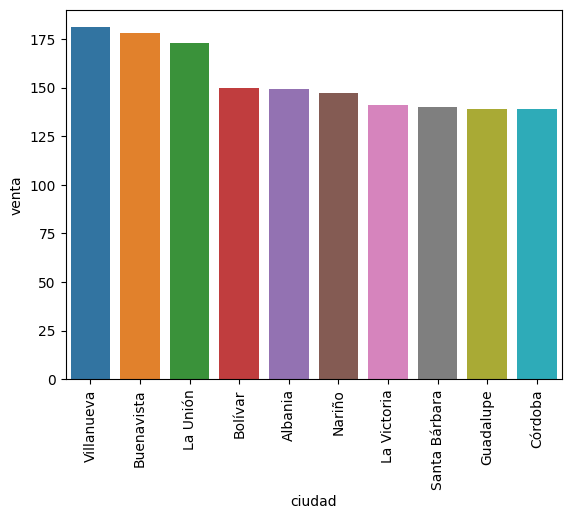

In [ ]:
ventas_ciudad= ventas.groupby(["ciudad"])["venta"].sum()
ventas_ciudad.sort_values(ascending=False, inplace=True)
ventas_ciudad = ventas_ciudad[0:10].reset_index()
ax = sns.barplot(y="venta", x="ciudad", data=ventas_ciudad, order=ventas_ciudad.sort_values('venta', ascending=False)["ciudad"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
#producto más popular en cada ciudad

ventas_ciudad_item = ventas.groupby(["ciudad","id_producto"])["venta"].sum().reset_index()

for ciudad in ventas_ciudad_item.ciudad.unique():
    agg_ventas_ciudad = ventas_ciudad_item.loc[ventas_ciudad_item["ciudad"] == ciudad]
    item_ciudad_sort = agg_ventas_ciudad.sort_values(["venta"], ascending=False)
    print(item_ciudad_sort.max())

ciudad         Abejorral
id_producto           89
venta                  3
dtype: object
ciudad         Abriaquí
id_producto          88
venta                 4
dtype: object
ciudad         Acacías
id_producto         89
venta                3
dtype: object
ciudad         Acandí
id_producto        89
venta               2
dtype: object
ciudad         Acevedo
id_producto         89
venta                2
dtype: object
ciudad         Achí
id_producto      87
venta             3
dtype: object
ciudad         Agrado
id_producto        88
venta               4
dtype: object
ciudad         Agua de Dios
id_producto              89
venta                     2
dtype: object
ciudad         Aguachica
id_producto           87
venta                  5
dtype: object
ciudad         Aguada
id_producto        89
venta               3
dtype: object
ciudad         Aguadas
id_producto         89
venta                2
dtype: object
ciudad         Aguazul
id_producto         89
venta                3
dtype:

Se observa que el producto más popular por ciudad es el producto 89.

In [ ]:
#conteo de la variable tiene_hijos
ventas['tiene_hijos'].value_counts()

1    50117
0    49883
Name: tiene_hijos, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['genero'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

genero,Femenino,Masculino,All
ciudad,,,
Abejorral,0.035,0.052,0.087
Abriaquí,0.047,0.041,0.088
Acacías,0.054,0.046,0.100
Acandí,0.050,0.035,0.085
Acevedo,0.042,0.038,0.080
...,...,...,...
Ábrego,0.051,0.050,0.101
Íquira,0.038,0.037,0.075
Úmbita,0.043,0.045,0.088


Hay un 3,5% de los clientes que son mujeres que son de la ciudad de Abejorral, así mismo, hay un 5,2% de los clientes que son hombres y son de la ciudad de Abejorral.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['genero'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

genero,Femenino,Masculino,All
ciudad,,,
Abejorral,0.035,0.052,0.087
Abriaquí,0.047,0.041,0.088
Acacías,0.054,0.046,0.100
Acandí,0.050,0.035,0.085
Acevedo,0.042,0.038,0.080
...,...,...,...
Ábrego,0.051,0.050,0.101
Íquira,0.038,0.037,0.075
Úmbita,0.043,0.045,0.088


Hay un 4,6% de los clientes que son Femeninas que son de la ciudad de útica y un 4,1% de los clientes Masculinos que viven en la misma ciudad.

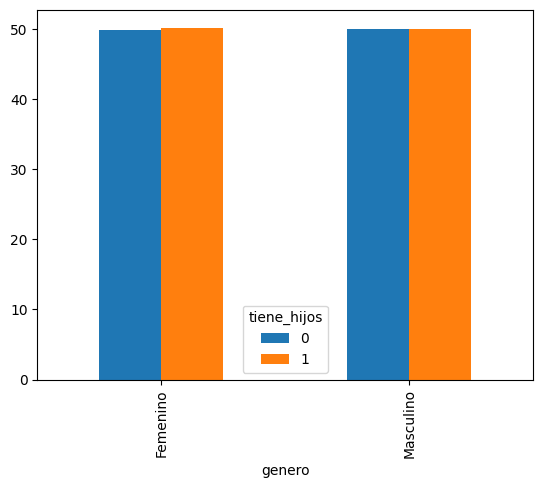

In [ ]:
#Gráfico de barras de genero según si tiene o no hijos
plot= pd.crosstab(index=ventas['genero'], columns= ventas['tiene_hijos']).apply(lambda r :r/r.sum()*100, axis= 1).plot(kind ='bar')

Se puede ver en el gráfico de barras que para los clientes de género femenino son levemente más las que tienen hijos vs las que no tienen hijos y para los clientes de género masculino, es similar la cantidad de clientes que tienen hijos a los que no tienen hijos.


In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
ciudad,,,
Abejorral,0.043,0.044,0.087
Abriaquí,0.039,0.049,0.088
Acacías,0.044,0.056,0.100
Acandí,0.042,0.043,0.085
Acevedo,0.034,0.046,0.080
...,...,...,...
Ábrego,0.043,0.058,0.101
Íquira,0.045,0.030,0.075
Úmbita,0.044,0.044,0.088


Hay un 4,3% de los clientes que viven en la ciudad de Aberjorral que no realizaron alguna compra, mientras que en la ciudad de Abriaquí el 4,9% de los clientes realizaron alguna compra.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['genero'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
genero,,,
Femenino,24.714,25.097,49.811
Masculino,25.157,25.032,50.189
All,49.871,50.129,100.000


El género masculino realizó el 25,15% de las no ventas de productos, superando el resto de los ítems de la tabla.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['tiene_hijos'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
tiene_hijos,,,
0,24.904,24.979,49.883
1,24.967,25.150,50.117
All,49.871,50.129,100.000


El 25,15% de los clientes que realizó una compra tiene hijos.

In [ ]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['edad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
edad,,,
18,0.704,0.760,1.464
19,0.818,0.797,1.615
20,0.780,0.787,1.567
21,0.822,0.820,1.642
22,0.803,0.752,1.555
...,...,...,...
78,0.767,0.816,1.583
79,0.790,0.752,1.542
80,0.810,0.816,1.626


<ipython-input-34-bad129a1e3dc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

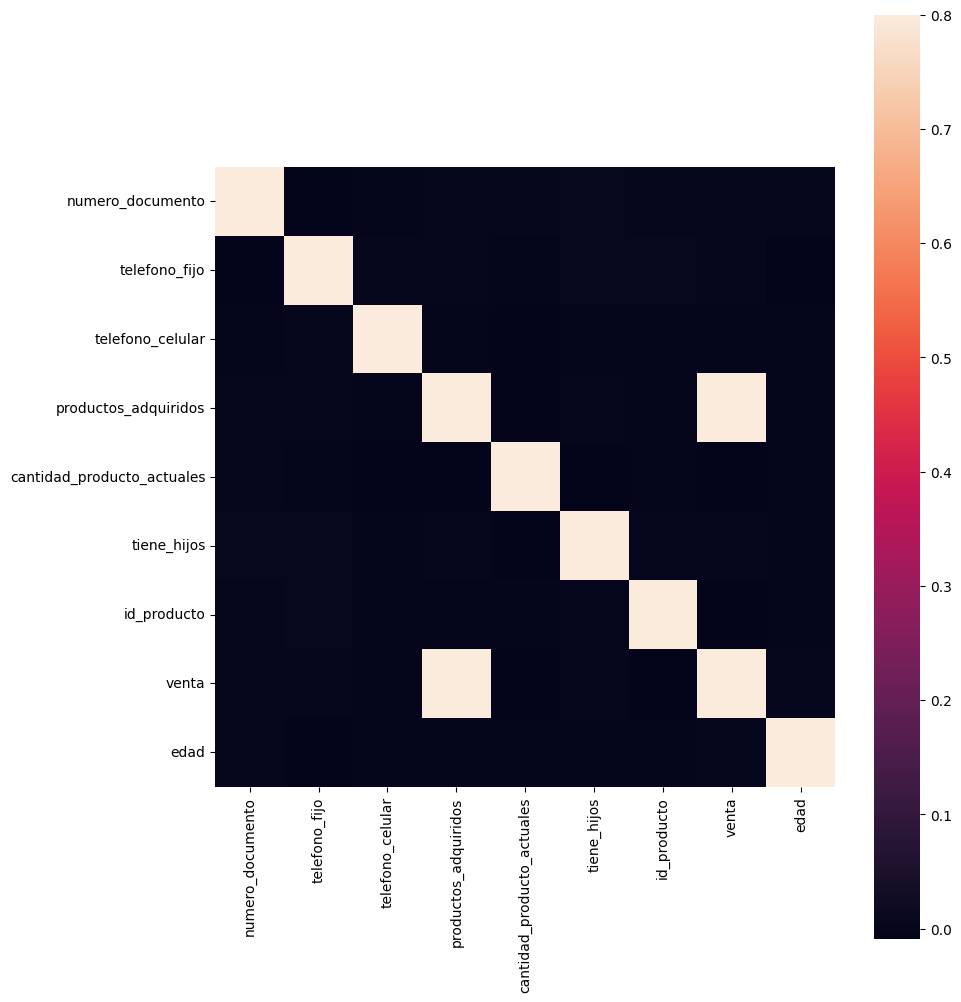

In [ ]:
#Miraremos el comportamiento del dataframe con respecto a todas las variables

corrmat= ventas.corr()
f, ax= plt.subplots(figsize=(10, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)


El mapa de calor de correlación nos indica que únicamente hay correlación lineal entre la variable venta y la varibale productos_adquiridos.
Es decir, que para el resto de las variables hay otros factores que afecten la relación entre esas variables y la venta.
las variables 'telefono_fijo' y 'telefono_celular' no son relevantes en el patrón de compra en este estudio.

En resumen, La ciudad de mayor número de clientes es la ciudad de Villanueva, aunque en nuestra muestra hay mayor número de clientes de género Masculino, los clientes femeninas compran más y compran más los clientes que tienen hijos, adicional, el producto que más se vende por ciudad es el producto 89.

Miraremos mas a fondo la variable 'id_producto'. Para ello, miraremos un conteo de los 10 productos más vendidos, realizaremos un cruce con la base de datos 'df_productos' para establecer estadísticas clave de los productos.

**Análisis de la variable 'id_producto'**

In [ ]:
#Conteo de los 10 primeros productos
ventas['id_producto'].value_counts().head(10)

78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64

Vamos a unir la base de datos de ventas con la base de datos de producto.Recordemos que la base de datos de ventas comprende información sobre clientes que ya han sido gestionados en otros ciclos campañales y que la base de datos de producto relaciona detalles sobre los diferentes productos disponibles para el consumo de los clientes.


In [ ]:
#Cargando la base de datos de productos

producto= pd.read_csv("/content/df_productos.csv", delimiter=";" , encoding='latin-1')
print(producto.head(10))

   producto_id      nombre     tipo      uso nacionalidad     valor
0            1  Producto A   Básico    Hogar    Importado  12410,41
1            2  Producto B  Premium  Oficina     Nacional  59598,42
2            3  Producto C    Nuevo    Hogar    Importado  46529,85
3            4  Producto D   Básico    Hogar    Importado  36847,89
4            5  Producto E  Premium    Hogar     Nacional   5778,32
5            6  Producto F  Premium  Oficina    Importado    5892,0
6            7  Producto G    Nuevo    Hogar     Nacional  50385,45
7            8  Producto H  Premium  Oficina     Nacional   50637,8
8            9  Producto I   Básico  Oficina    Importado  85144,12
9           10  Producto J  Premium  Oficina     Nacional  11597,45


In [ ]:
#visualizar el tamaño del dataset
producto.shape

(100, 6)

In [ ]:
producto.dtypes

producto_id      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor           object
dtype: object

In [ ]:
#modificando la variable 'valor'
producto['valor']= producto['valor'].str.replace(r"\W","")
print(producto)


    producto_id      nombre     tipo      uso nacionalidad    valor
0             1  Producto A   Básico    Hogar    Importado  1241041
1             2  Producto B  Premium  Oficina     Nacional  5959842
2             3  Producto C    Nuevo    Hogar    Importado  4652985
3             4  Producto D   Básico    Hogar    Importado  3684789
4             5  Producto E  Premium    Hogar     Nacional   577832
..          ...         ...      ...      ...          ...      ...
95           96  Producto R   Básico    Hogar     Nacional   554798
96           97  Producto S  Premium    Hogar     Nacional   671161
97           98  Producto T    Nuevo    Hogar    Importado  6880702
98           99  Producto U    Nuevo    Hogar     Nacional  2014314
99          100  Producto V  Premium    Hogar     Nacional  5603839

[100 rows x 6 columns]


<ipython-input-39-dc8cbe3d0430>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:

#modificando la variable 'valor' de object a int
producto['valor']= pd.to_numeric(producto['valor'].astype(int))
producto.dtypes

producto_id      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor            int64
dtype: object

In [ ]:
#Conteo de la variable nombre
producto['nombre'].value_counts().sample(10)


Producto W    3
Producto H    4
Producto V    4
Producto G    4
Producto A    4
Producto P    4
Producto Z    3
Producto E    4
Producto I    4
Producto N    4
Name: nombre, dtype: int64

In [ ]:
#Conteo para la variable nacionalidad
producto['nacionalidad'].value_counts()

Nacional     53
Importado    47
Name: nacionalidad, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
nombre,,,
Producto A,2.0,2.0,4.0
Producto B,2.0,2.0,4.0
Producto C,1.0,3.0,4.0
Producto D,2.0,2.0,4.0
Producto E,1.0,3.0,4.0
Producto F,3.0,1.0,4.0
Producto G,2.0,2.0,4.0
Producto H,0.0,4.0,4.0
Producto I,2.0,2.0,4.0


Se puede ver que los productos nacionales predominan los nombres de PRODUCTOC, PRODUCTOE, PRODUCTOH ,PRODUCTOQ ,PRODUCTOU ,PRODUCTOV y en productos importados predominan los nombres de PRODUCTOZ, PRODUCTOT, PRODUCTOP, PRODUCTOO, PRODUCTON y PRODUCTOF.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
uso,,,
Hogar,24.0,31.0,55.0
Oficina,23.0,22.0,45.0
All,47.0,53.0,100.0


Hay un 24% de productos que son de nacionalidad importados y de uso para el hogar, hay un 23% de productos que son de nacionalidad importados y de uso para la oficna. Asi mismo,hay un 31% de productos que son de nacionalidad nacional y de uso para el hogar, y hay un 22% de productos de nacionalidad 'nacional' y de uso para la oficina.

In [ ]:
#Conteo para la variable uso
producto['uso'].value_counts().head()

Hogar      55
Oficina    45
Name: uso, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
uso,,,,
Hogar,16.0,18.0,21.0,55.0
Oficina,16.0,12.0,17.0,45.0
All,32.0,30.0,38.0,100.0


Hay un 16% de productos que son de tipo 'básico' que son de uso para el hogar y para la oficina.
Hay un 18% de productos de tipo 'nuevo' que son en su mayoría de uso de hogar y hay un 17% de productos que son de tipo 'premium' que son en su mayoría de uso para la oficina.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['uso'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

uso,Hogar,Oficina,All
nombre,,,
Producto A,3.0,1.0,4.0
Producto B,2.0,2.0,4.0
Producto C,3.0,1.0,4.0
Producto D,3.0,1.0,4.0
Producto E,3.0,1.0,4.0
Producto F,2.0,2.0,4.0
Producto G,3.0,1.0,4.0
Producto H,2.0,2.0,4.0
Producto I,1.0,3.0,4.0


Los productos que predominan para el Hogar son los nombres de productos PRODUCTOR, PRODUCTOA, PRODUCTOC, PRODUCTOD, PRODUCTOE,G,K T,U.
El producto que predomina para la oficina es el nombre de producto PRODUCTOP.

In [ ]:
#Conteo para la variable tipo
producto['tipo'].value_counts().head()

Premium    38
Básico     32
Nuevo      30
Name: tipo, dtype: int64

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
nombre,,,,
Producto A,2.0,1.0,1.0,4.0
Producto B,0.0,1.0,3.0,4.0
Producto C,1.0,2.0,1.0,4.0
Producto D,2.0,1.0,1.0,4.0
Producto E,3.0,0.0,1.0,4.0
Producto F,1.0,1.0,2.0,4.0
Producto G,2.0,2.0,0.0,4.0
Producto H,0.0,1.0,3.0,4.0
Producto I,2.0,0.0,2.0,4.0


El producto que es de tipo más básico es el producto PRODUCTOE, el producto que predomina de tipo nuevo es el producto PRODUCTOV, y los productos que son de tipo premium son los productos PRODUCTOB, PRODUCTOH, PRODUCTOL.

In [ ]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['tipo'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
tipo,,,
Básico,21.0,11.0,32.0
Nuevo,10.0,20.0,30.0
Premium,16.0,22.0,38.0
All,47.0,53.0,100.0


Hay un 21% de los productos de tipo básico con son de nacionalida importados,los productos de tipo 'nuevo' son de nacionalidad nacional en un 20% y los productos premium son de nacionalidad nacional en un 22%.

In [ ]:
#Resumen de estadística descriptiva:
producto.describe()

,producto_id,valor
count,100.000000,1.000000e+02
mean,50.500000,4.555579e+06
std,29.011492,2.906434e+06
min,1.000000,5.892000e+04
25%,25.750000,2.175613e+06
50%,50.500000,4.619498e+06
75%,75.250000,6.681008e+06
max,100.000000,9.800829e+06


Analicemos el 'id_producto' por cada una de las variables de la base de datos de 'producto'


In [ ]:
data = pd.concat([producto['nombre'], producto['id_producto']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="id_producto", y="nombre", data=producto)

KeyError: ignored

Se puede observar que los productos que contienen menos cantidad de id_productos son los 'nombres' PRODUCTOW, PRODUCTOX, PRODUCTOY y PRODUCTOZ, que contienen 3 valores de id_producto cada uno.

In [ ]:
#Uniendo las bases de datos 'ventas' y 'producto' por medio de la variable 'id_producto'

df= pd.merge(ventas, producto, on='id_producto', how='inner')
print(df.head(10))



KeyError: ignored

In [ ]:
#verificando el tamaño de la base de datos

df.shape

Miremos las ganancias de los productos

In [ ]:
ganancias= round((df['productos_adquiridos']* df['valor']).sum(),2)
print(f"Ganancias totales de ventas : {ganancias}")


In [ ]:
#Ganancias por producto por año
df['year']= df['fecha_nacimiento'].dt.year
df.head(3)

In [ ]:
#Ganancias por año
df['Revenue']= df['id_producto']* df['valor']
ganancias_year = df[['Revenue','year']].groupby('year').sum().reset_index()
ganancias_year= ganancias_year.sort_values('Revenue', ascending= False)

df_ganancias= pd.DataFrame(ganancias_year)
df_ganancias


In [ ]:
print(np.min(df_ganancias))
print(np.max(df_ganancias))

In [ ]:
df_ganancias.index = df_ganancias['year']
df_ganancias = df_ganancias.drop('year', axis= 'columns')


In [ ]:
x= df_ganancias.index
y= df_ganancias['Revenue']
y

In [ ]:
#Gráfico de barras de ganancia por año
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, y)
ax.set_xlabel('año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por año')

El año con menores ventas fue 1941 con un total de $130.116.2337,85

In [ ]:
#Ganancias de ventas por ciudad
ganancias_ciudad =df[['Revenue','ciudad']].groupby('ciudad').sum().reset_index()
ganancias_ciudad= ganancias_ciudad.sort_values('Revenue', ascending= False)

ganancias_ciudad

La ciudad con mayor número de ventas de productos en la ciudad de Villanueva

In [ ]:
#producto que vendió más
producto_venta= df[['productos_adquiridos','id_producto']].groupby('id_producto').sum().reset_index()
producto_venta = producto_venta.sort_values('productos_adquiridos', ascending= False)
producto_venta

In [ ]:
#tabla de contingencia en porcentajes relativos total
cruce= pd.crosstab(index= df['id_producto'], columns= df['productos_adquiridos'] ,margins =True).apply(lambda r :r/len(df)*100, axis= 1)
cruce

In [ ]:
cruce.max()

Hay un porcentaje mayor de que ningun producto fue adquirido por algún cliente.

Como se había visto en el anális anterior de la tabla de ventas, el producto que vendió más por ciudad fue el 89. Repite el producto 89 como el más adquirido por los clientes en una cantidad de 7 unidades.
El nombre del producto es PRODUCTOK y es un producto tipo premium, con uso de hogar y es producto nacional.

Ahora vamos a tener presente el 'id_producto' 89 como objetivo de evaluación de comentarios del producto, para ello, cargamos la base de datos encuentas.csv para tener una idea más amplia de la satisfacción del cliente por el producto.

**Satisfacción por producto**

In [ ]:
#cargando base de datos encuestas

encuentas= pd.read_csv('/content/encuestas.csv', delimiter=";", encoding='latin-1')
print(encuentas.head(10))

In [ ]:
encuentas.dtypes

In [ ]:
#Haremos cruce de variables para entender un poco la base de datos encuentas
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['ciudad'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

In [ ]:
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

El producto 89 obtuvo una calificación de 1 en condición de insastisfacción por el cliente en un 30% de las encuentas

In [ ]:
cc=pd.crosstab(index= encuentas['ciudad'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)
cc

In [ ]:
#variable 'ciudad'
duplicados= encuentas['ciudad'].duplicated()

if duplicados.any():
  print(f"Hay valores duplicados.")
else:
  print(f"No hay valores duplicados")

#variable 'id_producto'
duplicados1= encuentas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")


In [ ]:
#Eliminando duplicados en la variable 'ciudad' y la variable 'id_producto'
sin_duplicados= encuentas.drop_duplicates(subset=['ciudad'])

sin_duplicados1= encuentas.drop_duplicates(subset=['id_producto'])


In [ ]:
nueva_encuestas= encuentas[encuentas['ciudad'].isin(sin_duplicados['ciudad'])]

In [ ]:
nuevo_df= nueva_encuestas[nueva_encuestas['id_producto'].isin(sin_duplicados1['id_producto'])]
print(nuevo_df.sample(10))

In [ ]:
nuevo_df.shape

In [ ]:
#integrando la base de datos encuentas a la base de datos de base de ventas y base de producto
df2= pd.merge(df, nuevo_df, on=['id_producto', 'ciudad'], how='inner')
print(df2.sample(10))

In [ ]:
df2.shape

In [ ]:
df.shape

**Presentando un modelo**

La clase que queremos predecir tiene valores en texto, y aunque algunos modelos de ML lo permiten, generalmente lo ideal es convertir todas las variables a valores numéricos para aprovechar la computación vectorizada de NumPy. Así que debajo convertimos rápidamente los valores de las variables categóricas en números.

In [ ]:
df2['genero'].unique()



In [ ]:
map_target_genero = {'Masculino': 0, 'Femenino': 1}

df2['generos'] = df2['genero'].map(map_target_genero)
df2['generos'] = df2['genero'].map(map_target_genero)

df2.head(2)

In [ ]:
df2['tipo'].unique()

In [ ]:
map_target_tipo = {'Premium': 0, 'Básico': 1, 'Nuevo':2}

df2['tipos'] = df2['tipo'].map(map_target_tipo)
df2['tipos'] = df2['tipo'].map(map_target_tipo)

df2.head(2)

In [ ]:
df2['uso'].unique()

In [ ]:
map_target_uso = {'Oficina': 0, 'Hogar': 1}

df2['usos'] = df2['uso'].map(map_target_uso)
df2['usos'] = df2['uso'].map(map_target_uso)

df2.head(2)

In [ ]:
df2['nacionalidad'].unique()

In [ ]:
map_target_nal = {'Nacional': 0, 'Importado': 1}

df2['nal'] = df2['nacionalidad'].map(map_target_nal)
df2['nal'] = df2['nacionalidad'].map(map_target_nal)

df2.head(2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#selescción de variables
new_data= df2.drop(['ciudad','nombre','comentarios', 'genero', 'fecha_nacimiento', 'tipo', 'nacionalidad','uso'], axis=1)
print(new_data.head(5))

In [ ]:
new_data.dtypes

**Modelamiento**

In [ ]:
#Usaremos el modelo de Gradient Boosting para predecir el numero de productos vendidos.
train_set = new_data.loc[new_data["venta"] == 0]
x_train = train_set.drop('id_producto', axis=1)
y_train = train_set['id_producto']

val_set = new_data.loc[new_data["venta"] == 1]
x_val = val_set.drop('id_producto', axis=1)
y_val = val_set['id_producto']

test_set = new_data.loc[new_data["venta"] == 1]
x_test = test_set.drop('id_producto', axis=1)
y_test = test_set['id_producto']

del train_set
del val_set
del test_set

In [ ]:
from sklearn.preprocessing import LabelEncoder

from itertools import product
from xgboost import XGBRegressor
from xgboost import plot_importance

model = XGBRegressor(max_depth=10, n_estimators=1000, min_child_weight=100,
                     colsample_bytree=0.8, subsample=1, eta=0.2)

model.fit(x_train, y_train, eval_metric="rmse",
          eval_set=[(x_train, y_train), (x_val, y_val)],
          verbose=True,
          early_stopping_rounds = 20)

In [ ]:
nueva= pd.read_csv('/content/nueva_base.csv', delimiter=";", encoding='latin-1')
print(nueva.head(5))

In [ ]:
# Se usa el modelo para predecir el número de ventas
y_test = model.predict(x_test).clip(0, 20)

final = pd.DataFrame({"id_producto": nueva['numero_documento'].index, "venta": y_test})

final.to_csv('bd_test_evaluate.csv', index=False)